# Underfitting & Overfitting

* underfitting se refere a quando o treinamento fica stagnado longe de um bom resultado
* overfitting é quando o algoritmo se ajusta completamente ao treinamento mas é ineficiente em situações reais

In [1]:
%pylab inline

import torch
from torch import nn
from torch.autograd import Variable
from torch import optim

from sklearn.datasets import make_blobs

from models import *

from jltheme import jltheme
jltheme()

Populating the interactive namespace from numpy and matplotlib


In [39]:
figsize(15, 8)

In [ ]:
data, target = make_blobs(n_samples=1000, center_box=(-3, 3))

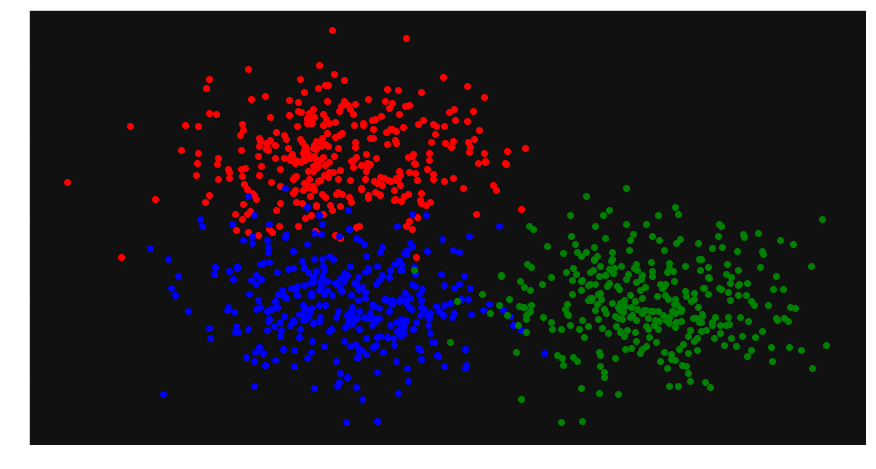

In [40]:
d0 = data[target==0]
d1 = data[target==1]
d2 = data[target==2]

plt.scatter(d0[:, 1:], d0[:, :1], color='red')
plt.scatter(d1[:, 1:], d1[:, :1], color='blue')
plt.scatter(d2[:, 1:], d1[:, :1], color='green')

In [16]:
data_var = Variable(torch.FloatTensor(data.tolist()))
target_var = Variable(torch.LongTensor(target.tolist()))

### cenário 1 - poucas camadas, hidden_layer baixo

In [17]:
def train(model, data, target, lr=1e-5, epochs=100, dropout=False):
    
    loss_ac = []
    perc_t_ac = []
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        out = model(data, dropout)
        loss = criterion(out, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_ac.append(loss.item())
        _tmp = torch.abs(out.argmax(dim=1) - target)
        acertos = len(_tmp[_tmp==0])/len(target)
        perc_t_ac.append(acertos)
        
    return loss_ac, perc_t_ac

In [55]:
ex1 = Ex1(2, 8, 3)
ex2 = Ex1(2, 256, 3)
ex3 = Ex1(2, 8, 3)
ex4 = Ex1(2, 256, 3)

Text(0.5,1,'ax4 - loss: (1.72,0.20) - perc: (0.06, 0.96)')

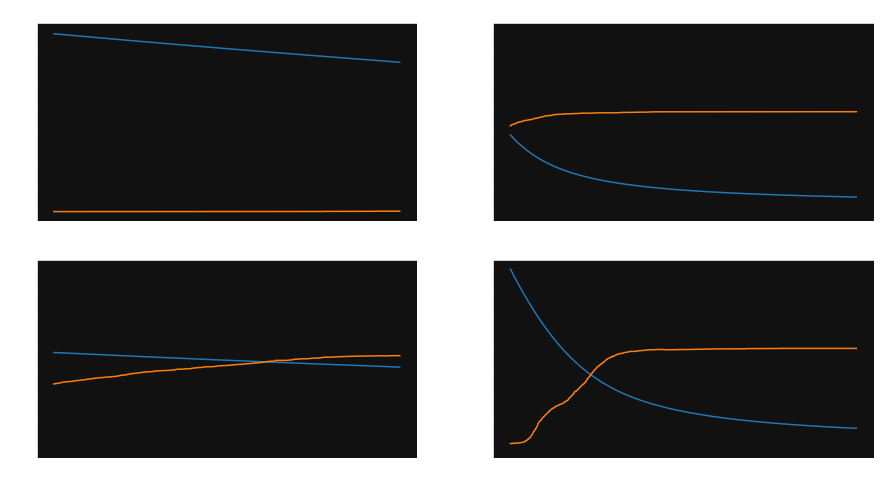

In [56]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

loss_ex1, perc_ex1 = train(ex1, data_var, target_var, epochs=2000)
axs[0,0].plot(loss_ex1)
axs[0,0].plot(perc_ex1)
axs[0,0].set_title(f'ax1 - loss: ({loss_ex1[0]:.2f},{loss_ex1[-1]:.2f}) - perc: ({perc_ex1[0]:.2f}, {perc_ex1[-1]:.2f})')

loss_ex2, perc_ex2 = train(ex2, data_var, target_var, epochs=2000)
axs[0,1].plot(loss_ex2)
axs[0,1].plot(perc_ex2)
axs[0,1].set_title(f'ax2 - loss: ({loss_ex2[0]:.2f},{loss_ex2[-1]:.2f}) - perc: ({perc_ex2[0]:.2f}, {perc_ex2[-1]:.2f})')

loss_ex3, perc_ex3 = train(ex3, data_var, target_var, epochs=2000)
axs[1,0].plot(loss_ex3)
axs[1,0].plot(perc_ex3)
axs[1,0].set_title(f'ax3 - loss: ({loss_ex3[0]:.2f},{loss_ex3[-1]:.2f}) - perc: ({perc_ex3[0]:.2f}, {perc_ex3[-1]:.2f})')

loss_ex4, perc_ex4 = train(ex4, data_var, target_var, epochs=2000)
axs[1,1].plot(loss_ex4)
axs[1,1].plot(perc_ex4)
axs[1,1].set_title(f'ax4 - loss: ({loss_ex4[0]:.2f},{loss_ex4[-1]:.2f}) - perc: ({perc_ex4[0]:.2f}, {perc_ex4[-1]:.2f})')

In [49]:
ex1_drop = Ex1(2, 8, 3)
ex2_drop = Ex1(2, 256, 3)
ex3_drop = Ex1(2, 8, 3)
ex4_drop = Ex1(2, 256, 3)

Text(0.5,1,'ax4 - loss: (1.06,0.17) - perc: (0.36, 0.96)')

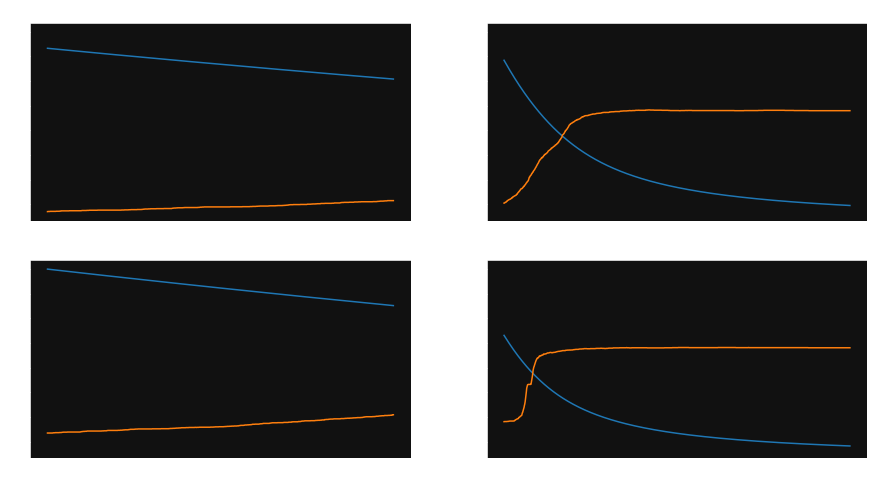

In [50]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

loss_ex1_drop, perc_ex1_drop = train(ex1_drop, data_var, target_var, epochs=2000, dropout=True)
axs[0,0].plot(loss_ex1_drop)
axs[0,0].plot(perc_ex1_drop)
axs[0,0].set_title(f'ax1 - loss: ({loss_ex1_drop[0]:.2f},{loss_ex1_drop[-1]:.2f}) - perc: ({perc_ex1_drop[0]:.2f}, {perc_ex1_drop[-1]:.2f})')

loss_ex2_drop, perc_ex2_drop = train(ex2_drop, data_var, target_var, epochs=2000, dropout=True)
axs[0,1].plot(loss_ex2_drop)
axs[0,1].plot(perc_ex2_drop)
axs[0,1].set_title(f'ax2 - loss: ({loss_ex2_drop[0]:.2f},{loss_ex2_drop[-1]:.2f}) - perc: ({perc_ex2_drop[0]:.2f}, {perc_ex2_drop[-1]:.2f})')

loss_ex3_drop, perc_ex3_drop = train(ex3_drop, data_var, target_var, epochs=2000, dropout=True)
axs[1,0].plot(loss_ex3_drop)
axs[1,0].plot(perc_ex3_drop)
axs[1,0].set_title(f'ax3 - loss: ({loss_ex3_drop[0]:.2f},{loss_ex3_drop[-1]:.2f}) - perc: ({perc_ex3_drop[0]:.2f}, {perc_ex3_drop[-1]:.2f})')

loss_ex4_drop, perc_ex4_drop = train(ex4_drop, data_var, target_var, epochs=2000, dropout=True)
axs[1,1].plot(loss_ex4_drop)
axs[1,1].plot(perc_ex4_drop)
axs[1,1].set_title(f'ax4 - loss: ({loss_ex4_drop[0]:.2f},{loss_ex4_drop[-1]:.2f}) - perc: ({perc_ex4_drop[0]:.2f}, {perc_ex4_drop[-1]:.2f})')